# Trabajo Práctico Nro. 3
## Mineria de Datos - 2024.
#### Tec. Universitaria en Inteligencia Artificial - FCEIA (UNR).

### Integrantes:
 * Pace, Bruno. Legajo: P-5295/7.
 * Sancho Almenar, Mariano. Legajo: S-5778/9.

[Link al repositorio](https://github.com/bpace1/TP3-Mineria-De-Datos)

In [7]:
# Manejo de datos
import pandas as pd
import numpy as np

# Gráficos
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

# Modealdo
from sklearn.preprocessing import StandardScaler
#from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV, PredefinedSplit, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, recall_score, f1_score, precision_score
from sklearn.tree import export_graphviz
from IPython.display import display
import graphviz
from scipy.stats import randint

# Tipado
from typing import Dict, Any, List, Generator

# Wanings
import warnings
warnings.filterwarnings("ignore")

# Path
import os


#### Lectura de dataset

Lectura del dataset de los datos del tiempo con la ayuda de la librería OS para poder trabajar sin problemas con las rutas del archivo.

In [8]:
# PATH = os.getcwd()
# DATA_PATH = os.path.join(PATH, 'data')

In [9]:
# df: pd.DataFrame = pd.read_csv(os.path.join(DATA_PATH,'dxWeather.csv'))
df: pd.DataFrame = pd.read_csv('dxWeather.csv')

# Pre - procesamiento de datos
- EDA.
- Transformación de datos.
- Visualización de datos.


Descripción del dataset:

- **Temperatura (numérica)**: La temperatura en grados Celsius, que varía desde frío extremo hasta calor extremo.  
- **Humedad (numérica)**: El porcentaje de humedad, incluyendo valores superiores al 100% para introducir valores atípicos.  
- **Velocidad del Viento (numérica)**: La velocidad del viento en kilómetros por hora, con un rango que incluye valores irrealistamente altos.  
- **Precipitación (%) (numérica)**: El porcentaje de precipitación, incluyendo valores atípicos.  
- **Cobertura de Nubes (categórica)**: La descripción de la cobertura de nubes.  
- **Presión Atmosférica (numérica)**: La presión atmosférica en hPa, cubriendo un amplio rango.  
- **Índice UV (numérica)**: El índice UV, que indica la intensidad de la radiación ultravioleta.  
- **Estación (categórica)**: La estación del año en la que se registraron los datos.  
- **Visibilidad (km) (numérica)**: La visibilidad en kilómetros, incluyendo valores muy bajos o muy altos.  
- **Ubicación (categórica)**: El tipo de ubicación donde se registraron los datos.  
- **Tipo de Clima (categórica)**: La variable objetivo para la clasificación, que indica el tipo de clima.  


[Link al dataset](https://www.kaggle.com/datasets/nikhil7280/weather-type-classification/) (1)

(1) es una modificacion del dataset original.



Estamos frente a un dataset que tiene 10.090 entradas y 8 columnas con tipos de datos int, float y object.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10090 entries, 0 to 10089
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temperatura         10090 non-null  int64  
 1   Humedad             10090 non-null  int64  
 2   VientoVelocidad     10090 non-null  float64
 3   Precipitation       10090 non-null  int64  
 4   PresionAtmosferica  10090 non-null  float64
 5   Localizacion        10090 non-null  object 
 6   TipoClima           10090 non-null  object 
 7   Estacion            10090 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 630.8+ KB


La columna 'Precipitation' está en inglés, mientras que las demás están en español.

In [11]:
df.columns

Index(['Temperatura', 'Humedad', 'VientoVelocidad', 'Precipitation',
       'PresionAtmosferica', 'Localizacion', 'TipoClima', 'Estacion'],
      dtype='object')

Creo una copia para trabajar el dataset sin sobreescribir el original.

In [12]:
df_renamed: pd.DataFrame = df.copy()

In [13]:
df_renamed['Precipitacion'] = df_renamed['Precipitation']
df_renamed = df_renamed.drop(columns=['Precipitation'])

In [14]:
df_renamed.columns

Index(['Temperatura', 'Humedad', 'VientoVelocidad', 'PresionAtmosferica',
       'Localizacion', 'TipoClima', 'Estacion', 'Precipitacion'],
      dtype='object')

Exploración de una muestra chica del dataset.  

In [15]:
df_renamed.sample(5)

,Temperatura,Humedad,VientoVelocidad,PresionAtmosferica,Localizacion,TipoClima,Estacion,Precipitacion
4593,13,96,7.0,1012.72,Costa,Lluvioso,Invierno,50
5356,54,109,13.5,997.96,Montania,Lluvioso,Primavera,83
5064,12,52,14.5,941.05,Llanura,Soleado,Primavera,74
71,23,88,11.5,1000.74,Montania,Lluvioso,Invierno,65
2389,15,98,14.5,1002.19,Montania,Lluvioso,Otonio,78


Chequeo valores únicos en las columnas categóricas. De esta manera descarto la existencia de la letra 'ñ' en el caso de Otonio y Montania y que todos los campos incian con mayúsculas.

In [16]:
print(pd.unique(df_renamed['Estacion']))
print(pd.unique(df_renamed['Localizacion']))
print(pd.unique(df_renamed['TipoClima']))

['Primavera' 'Verano' 'Invierno' 'Otonio']
['Llanura' 'Montania' 'Costa']
['Nublado' 'Soleado' 'Nevado' 'Lluvioso']


Chequeo de valores faltantes: no existen faltantes en el dataset.

In [17]:
df_renamed.isna().sum()

,0
Temperatura,0
Humedad,0
VientoVelocidad,0
PresionAtmosferica,0
Localizacion,0
TipoClima,0
Estacion,0
Precipitacion,0


In [18]:
columnas_categoricas: list[str] = ['Localizacion', 'TipoClima', 'Estacion']
columnas_numericas: list[str] = ['Temperatura', 'Humedad', 'VientoVelocidad','PresionAtmosferica','Precipitacion']

Vemos que tenemos un gran desvío estandar en las variables Precipitacion, Temperatura y PresionAtmosferica

In [19]:
df_renamed.describe()

,Temperatura,Humedad,VientoVelocidad,PresionAtmosferica,Precipitacion
count,10090.000000,10090.000000,10090.000000,10090.000000,10090.000000
mean,21.872349,67.195045,9.634936,1007.685836,50.796333
std,16.426722,20.463797,6.795890,38.763971,32.333798
min,-24.000000,20.000000,0.000000,800.230000,0.000000
25%,13.000000,55.000000,5.000000,998.570000,18.000000
50%,23.000000,69.000000,8.500000,1010.315000,53.000000
75%,32.000000,81.000000,13.500000,1017.820000,80.000000
max,109.000000,109.000000,47.500000,1199.210000,109.000000


Debido a las distintas escalas de los datos, más allá que vemos necesario normalizar, se procede a visualizar los datos con un histograma.

In [20]:
df_renamed.columns

Index(['Temperatura', 'Humedad', 'VientoVelocidad', 'PresionAtmosferica',
       'Localizacion', 'TipoClima', 'Estacion', 'Precipitacion'],
      dtype='object')

# Visualizaciones

## Distribuciones

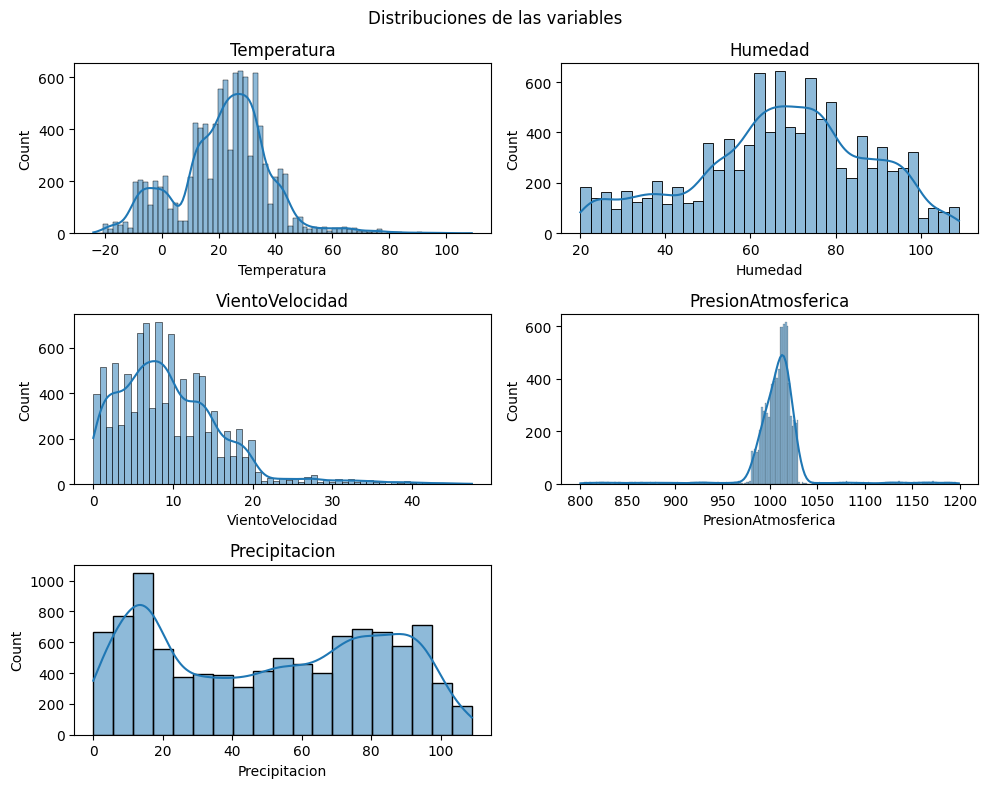

In [44]:
fig, axes = plt.subplots(3, 2, figsize=(10,8))

plt.suptitle('Distribuciones de las variables')

for i, column in enumerate(columnas_numericas):
    row = i // 2
    col = i % 2
    sns.histplot(df_renamed[column], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'{column}')

axes[2, 1].axis('off')
plt.tight_layout()
plt.show()

Distribuciones observadas:
- Temperatura, Humedad, VientoVelocidad PresionAtmosferica tienen una distribucion normal. PresionAtmosferica tiene una colas pesadas tanto hacia la derecha como hacia la izquierda. VientoVelocidad presenta una cola pesada hacia la derecha.
- Precipitacion tiene a ser uniforme.

## Boxplots

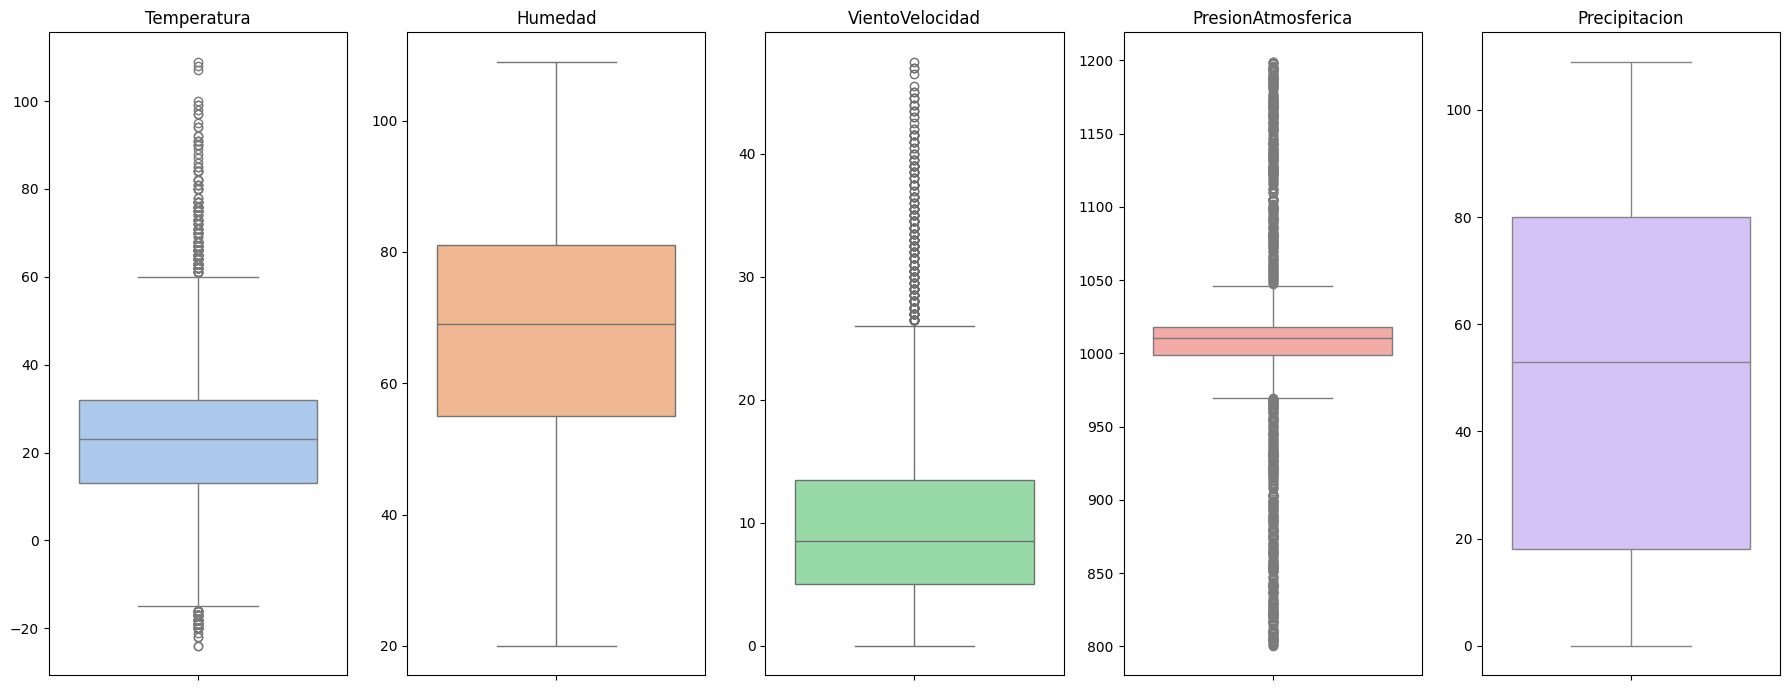

In [87]:
fig, axes = plt.subplots(1, 5, figsize=(18, 7))
palette = sns.color_palette("pastel")

for i, (column, color) in enumerate(zip(columnas_numericas, palette)):
  sns.boxplot(data=df_renamed[column], ax=axes[i],  color=color)
  axes[i].set_title(f'{column}')
  axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

Se observan posibles valore atípicos en las columnas de **temperatura**, la **velocidad el viento** y la **presión atmosférica**

Además, se alcanzan temperaturas extremas, como lo pueden ser aquellas que superan los 50°C. Decidimos no modificar estos datos ya que se trata de un dataset generado sintéticamente y sólo nos centraremos en analizar los posibles valores atípicos con respecto a su distribución.

## Scatterplots

Se realizan dos scatterplots con la intención de visualizar el comportamiento de la temperatura y la velocidad el viento con respecto a la estación del año


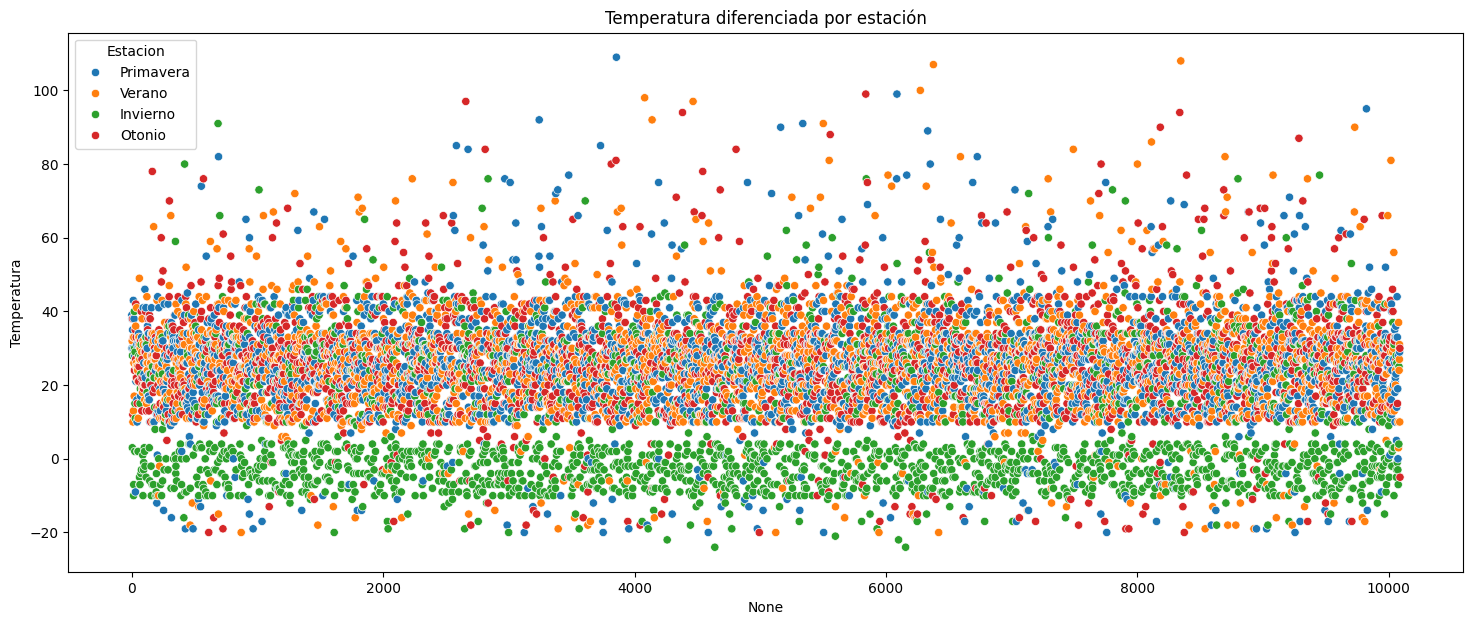

In [69]:
fig = plt.figure(figsize = (18,7))
sns.scatterplot(data=df_renamed, x=df_renamed.index, y='Temperatura', hue='Estacion')
plt.title('Temperatura diferenciada por estación')
plt.show()

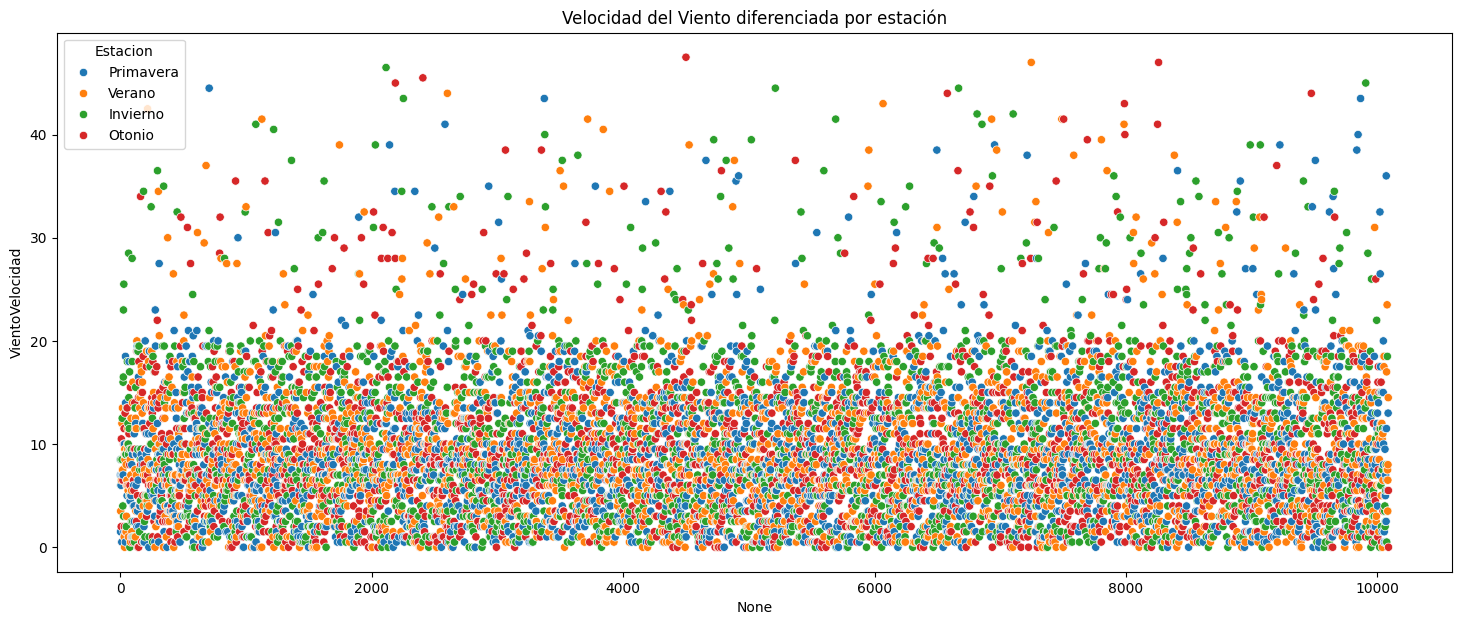

In [70]:
fig = plt.figure(figsize = (18,7))
sns.scatterplot(data=df_renamed, x=df_renamed.index, y='VientoVelocidad', hue='Estacion')
plt.title('Velocidad del Viento diferenciada por estación')
plt.show()

En ambos scatterplots, podemos observar que las temperaturas no tienen relacion con las estaciones del año. Esto se debe a que es un dataset generado de forma sintetica. En el caso del viento, se visualiza algo similar.

## Matriz de correalción

In [25]:
corr = df_renamed[columnas_numericas].corr()

px.imshow(corr,  zmin=-1, zmax=1, title='Correlación de las variables', text_auto=True, color_continuous_scale='RdBu', aspect='auto')

No vemos correlaciones fuertes. Sin embargo, podemos destacar humedad - precipitacion. Esto es logico.

# Valores atípicos

Teniendo en cuenta los análisis previos, se toma como criterio que los valores fuera del rango definido por
${Q1−1.5×IQR}$  y ${Q3+1.5×IQR}$ son considerados outliers.

In [72]:
df_outliers: pd.DataFrame = pd.DataFrame()
df_without_outliers: pd.DataFrame = df_renamed.copy()

for column in columnas_numericas:
    q1 = df_renamed[column].quantile(0.25)
    q3 = df_renamed[column].quantile(0.75)
    iqr: float = q3 - q1

    lower_limit: float = q1 - 1.5 * iqr
    upper_limit: float = q3 + 1.5 * iqr


    median_ = df_renamed[column].median()

    outliers = df_renamed.loc[
        (df_renamed[column] < lower_limit) | (df_renamed[column] > upper_limit)
    ]

    df_outliers = pd.concat([df_outliers, outliers])
    df_without_outliers[column] = df_without_outliers[column].apply(
        lambda x: median_ if x < lower_limit or x > upper_limit else x
    )


df_outliers = df_outliers.drop_duplicates()

print(f'Existían {df_outliers.shape[0]} filas con outliers.')

Existían 1311 filas con outliers.


In [80]:
df_outliers['Localizacion'].value_counts()

,count
Localizacion,
Llanura,452
Montania,436
Costa,423


Teniendo en cuenta el RIC, se observa que un 13% de los datos corresponden a valores atípicos.

Para corroborar si se tratase de atípicos globales o locales, se realizan 3 gráficos de barra localizacion, el tipo de clima y la estación.

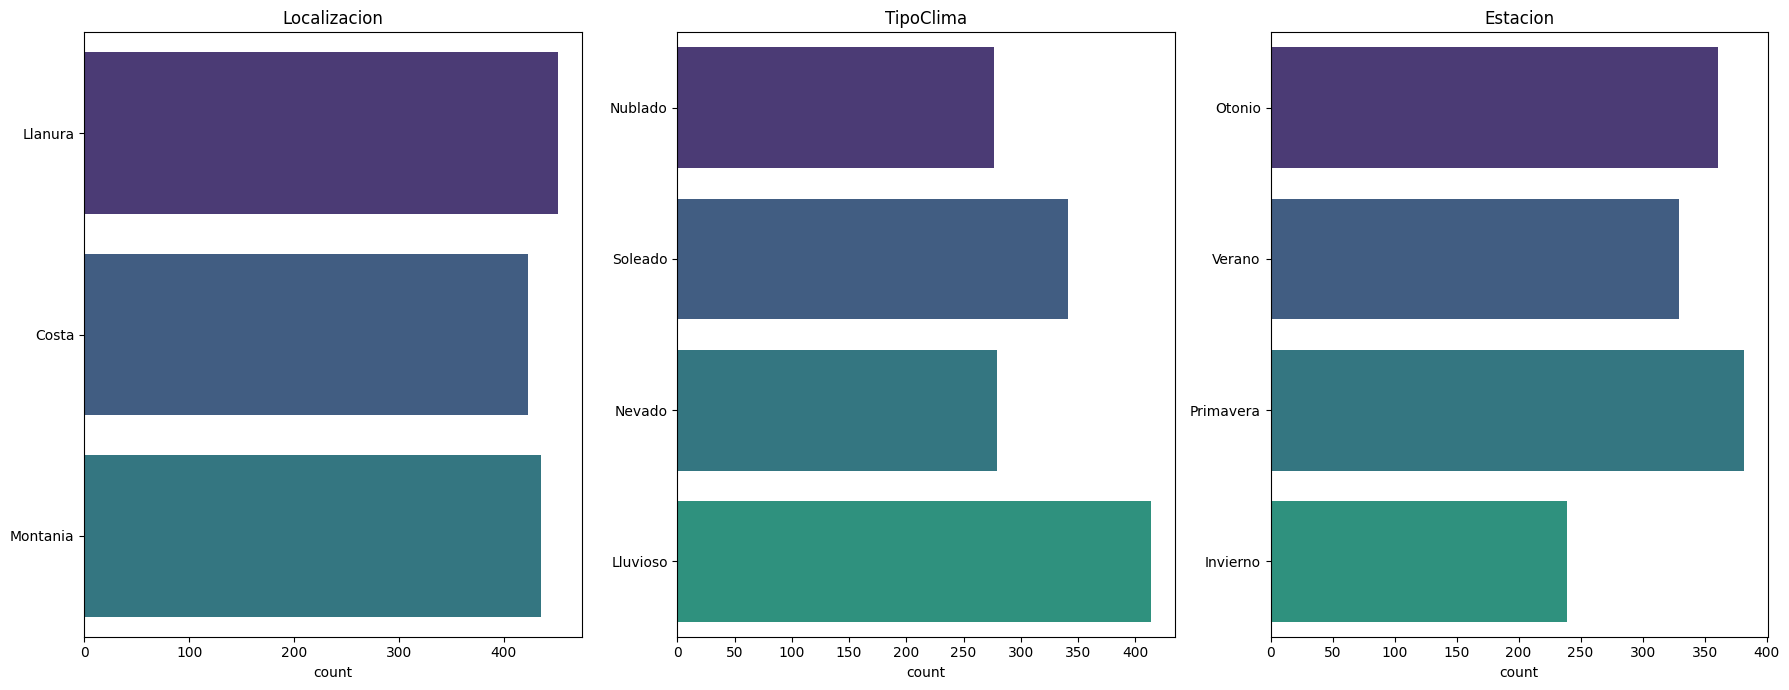

In [86]:
fig, axes = plt.subplots(1, 3, figsize=(18, 7))
palette = sns.color_palette("viridis")

for i, column in enumerate(columnas_categoricas):
  sns.countplot(data=df_outliers[column], ax=axes[i], palette = palette)
  axes[i].set_title(f'{column}')
  axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

Si bien las distribuciones del tipo de clima y la estación no se encuentra del todo balanceado, no observamos una tendencia marca hacia una sola categoría, por lo que trataremos a los valores atípicos como **globales**.

Cómo muchas de las distribuciones son aproximadamente normales, optamos por rellenar esos outliers con la mediana de la columna correspondiente.

# Estandarización

Se utiliza la técnica Z-Score.

In [27]:
scaler: StandardScaler = StandardScaler()

df_scaled: pd.DataFrame = pd.DataFrame(scaler.fit_transform(df_without_outliers.drop(columns=columnas_categoricas)), columns=columnas_numericas)

In [28]:
df_scaled = pd.concat([df_scaled, df_without_outliers[columnas_categoricas]], axis=1)
df_scaled.head()

,Temperatura,Humedad,VientoVelocidad,PresionAtmosferica,Precipitacion,Localizacion,TipoClima,Estacion
0,1.234983,1.407675,-0.078074,0.248446,0.624878,Llanura,Nublado,Primavera
1,0.604399,-0.156139,-0.356764,0.879463,-1.076213,Montania,Soleado,Primavera
2,1.164918,0.772376,-1.378629,1.531255,0.965096,Costa,Soleado,Primavera
3,0.744529,-0.595962,-1.007041,0.127263,-0.766924,Llanura,Nublado,Verano
4,-1.287355,0.870114,-0.542558,-2.086060,1.398101,Llanura,Nevado,Invierno


Chequeamos que la estandarización de los datos es correcta.

In [29]:
df_scaled.describe()

,Temperatura,Humedad,VientoVelocidad,PresionAtmosferica,Precipitacion
count,1.009000e+04,1.009000e+04,1.009000e+04,1.009000e+04,1.009000e+04
mean,-4.982250e-17,2.042194e-16,-1.605587e-16,-6.823745e-16,-3.661865e-17
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-2.548524e+00,-2.306384e+00,-1.657319e+00,-3.360213e+00,-1.571076e+00
25%,-5.867054e-01,-5.959622e-01,-7.283512e-01,-6.454959e-01,-1.014355e+00
50%,1.139441e-01,8.820674e-02,-7.807379e-02,1.519321e-01,6.815705e-02
75%,6.744637e-01,6.746372e-01,6.651003e-01,7.000691e-01,9.032380e-01
max,2.706347e+00,2.042975e+00,3.173313e+00,3.252921e+00,1.800177e+00


# Balance target

Chequeo de balanceo de clases target: vemos que las clases están prácticamente balanceadas.


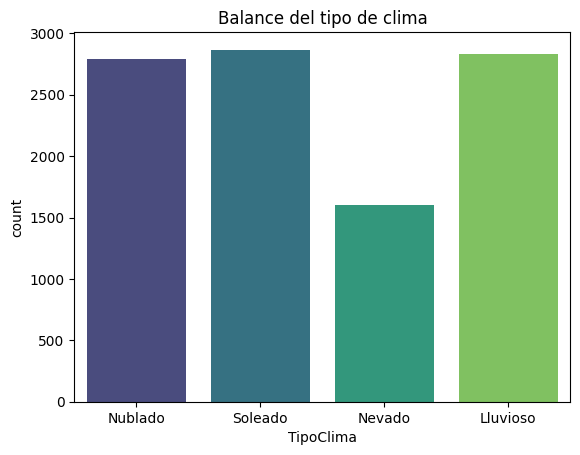

In [89]:
sns.countplot(data=df_scaled, x='TipoClima', palette = 'viridis')
plt.title('Balance del tipo de clima')
plt.show()

# Codificación de variables

Para las variables de la localización y el tipo de clima se utilizará One-Hot Encoding para su codificación

In [90]:
df_dummies: pd.DataFrame = pd.get_dummies(df_scaled, columns=['Localizacion', 'TipoClima'], dtype=int)
df_dummies.sample(3)

,Temperatura,Humedad,VientoVelocidad,PresionAtmosferica,Precipitacion,Estacion,Localizacion_Costa,Localizacion_Llanura,Localizacion_Montania,TipoClima_Lluvioso,TipoClima_Nevado,TipoClima_Nublado,TipoClima_Soleado
2975,0.604399,0.723506,0.107720,-0.025082,1.490887,Primavera,0,1,0,1,0,0,0
7462,0.324139,0.039338,0.293513,0.816275,-1.261787,Verano,0,0,1,0,0,1,0
3157,0.884659,-0.058401,0.572204,-1.043020,0.315588,Primavera,1,0,0,1,0,0,0


# Implementacion de Modelos

## Separación de dataset en train-test

Primeramente, se selecciona la variable target 'Estacion' y se crea también el dataset X con las variables restantes.

In [32]:
X: pd.DataFrame = df_dummies.drop(columns=['Estacion'])
y: pd.DataFrame = df_dummies[['Estacion']]



Separación en Train y Test. Se utiliza un 20% de para los datos de test y un 80% para los de train.


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
clase_nombres = np.unique(y_test) # Obtengo los nombres de las clases, eso es necesario para un mejor entendimiento de la matriz de confusión

## SVC: Maquina de Vectores Soporte.

### Linear Kernel



Definición de un diccionario que contiene los posibles valores de C (costo).


In [34]:
parametros_linear_kernal: Dict[str, List[float]] = {
    'C' : [0.1,0.05 ,0.2 ,0.5 ,0.8, 1 , 5, 10 , 40]
}

Se inicializa el modelo de SVM y se busca el mejor mediante GridSearch. Se utiliza 'recall' como métrica ya que es importante que diferencie bien entre categorías. No optimizamos gamma ya que no participa en el kernel lineal.

[Link Documentación de SVM, inciso 1.4.6](https://scikit-learn.org/stable/modules/svm.html)

In [35]:
recall_parameter: dict[float, float] = {}

for c in parametros_linear_kernal['C']:
    svc_linear = SVC(C=c, kernel='linear', random_state=42)
    svc_linear.fit(X_train, y_train)
    y_pred_svc_linear = svc_linear.predict(X_test
                                           )
    recall_parameter[c] = recall_score(y_test, y_pred_svc_linear, average='weighted')

    print(f'C={c}: \n')
    print(classification_report(y_test, y_pred_svc_linear))
    print("-------------")


C=0.1: 

              precision    recall  f1-score   support

    Invierno       0.86      0.54      0.67       498
      Otonio       0.26      0.20      0.23       506
   Primavera       0.30      0.51      0.38       526
      Verano       0.29      0.26      0.27       488

    accuracy                           0.38      2018
   macro avg       0.43      0.38      0.39      2018
weighted avg       0.43      0.38      0.39      2018

-------------
C=0.05: 

              precision    recall  f1-score   support

    Invierno       0.86      0.54      0.67       498
      Otonio       0.26      0.18      0.21       506
   Primavera       0.31      0.54      0.39       526
      Verano       0.29      0.25      0.26       488

    accuracy                           0.38      2018
   macro avg       0.43      0.38      0.38      2018
weighted avg       0.43      0.38      0.38      2018

-------------
C=0.2: 

              precision    recall  f1-score   support

    Invierno       

Se observa que a partir de un C = 0.2, se mantienen las métricas. Por ende, elegimos ese.

Notamos que las clases que mejor fueron predichas fueron Invierno y Primavera, ambos con un Recall de 0.54

In [98]:
svc_linear = SVC(C= 0.2, kernel='linear', random_state=42)
svc_linear.fit(X_train, y_train)
y_pred_svc_linear = svc_linear.predict(X_test)

#### Matriz de confusión

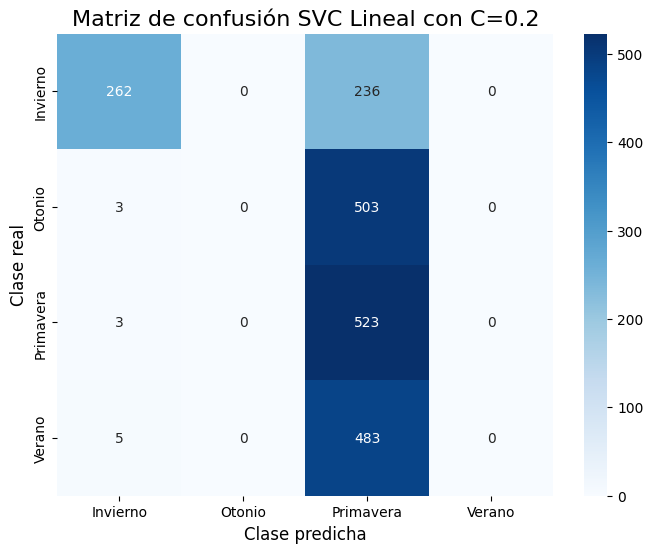

In [118]:
cm_lineal = confusion_matrix(y_test, y_pred_svc_linear)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clase_nombres, yticklabels=clase_nombres)

plt.title('Matriz de confusión SVC Lineal con C=0.2', fontsize=16)
plt.xlabel('Clase predicha', fontsize=12)
plt.ylabel('Clase real', fontsize=12)

plt.show()

Se observa que el modelo tiende a clasificar incorrectamente con mayor frecuencia la estación del año como Primavera, esto nos muestra por qué Otoño y Verano tienen un valor de Recall menor.

#### Cross-Validation

In [36]:
svc_linear_kfold: SVC = SVC(C=0.2, kernel='linear', random_state=42)

In [37]:
sfolder: StratifiedKFold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

recall_metrics: dict[str, float] = {}
f1_metrics: dict[str, float] = {}
precision_metrics: dict[str, float] = {}
accuracy_metrics: dict[str, float] = {}

gen: Generator = sfolder.split(X, y)
count: int = 1
for train_index, test_index in gen:

    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    svc_linear_kfold.fit(x_train_fold, y_train_fold)

    y_pred_svc_linear_kfold = svc_linear_kfold.predict(x_test_fold)

    recall_metrics[f'Recall {count}'] = recall_score(y_test_fold, y_pred_svc_linear_kfold, average='macro')
    f1_metrics[f'F1 - {count}'] = f1_score(y_test_fold, y_pred_svc_linear_kfold, average='macro')
    precision_metrics[f'Precision {count}'] = precision_score(y_test_fold, y_pred_svc_linear_kfold, average='macro')
    accuracy_metrics[f'Accuracy {count}'] = accuracy_score(y_test_fold, y_pred_svc_linear_kfold)

    print(f'Métricas del conjunto nro: {count}')
    print(f'Recall: {recall_metrics[f"Recall {count}"]}')
    print(f'F1: {f1_metrics[f"F1 - {count}"]}')
    print(f'Precision: {precision_metrics[f"Precision {count}"]}')
    print(f'Accuracy: {accuracy_metrics[f"Accuracy {count}"]}')
    print("--------------------------------------------------------------------------------")

    count += 1

Métricas del conjunto nro: 1
Recall: 0.376428405931418
F1: 0.3679843485985434
Precision: 0.4266555508957243
Accuracy: 0.37908820614469774
--------------------------------------------------------------------------------
Métricas del conjunto nro: 2
Recall: 0.3618456904541242
F1: 0.37655864478175116
Precision: 0.4181100027530443
Accuracy: 0.3622398414271556
--------------------------------------------------------------------------------
Métricas del conjunto nro: 3
Recall: 0.3700940685820204
F1: 0.36624127516017496
Precision: 0.42646708568879593
Accuracy: 0.3726461843409316
--------------------------------------------------------------------------------
Métricas del conjunto nro: 4
Recall: 0.37779792919171673
F1: 0.34158404556182737
Precision: 0.35603311679616106
Accuracy: 0.38057482656095143
--------------------------------------------------------------------------------
Métricas del conjunto nro: 5
Recall: 0.3823974268382623
F1: 0.39684925315984443
Precision: 0.43500419492236486
Accura

Se observa que las métricas obtenidas en CV son consistentes

### Gaussian Kernel

Generamos un modelo sin optimizar parámetros, por default para tener una base de comparación.

In [38]:
svc_gaussian_kernel_base: SVC = SVC(kernel='rbf', random_state=42).fit(X_train, y_train)

y_pred_svc_gaussian_kernel_base = svc_gaussian_kernel_base.predict(X_test)

print(classification_report(y_test, y_pred_svc_gaussian_kernel_base))

              precision    recall  f1-score   support

    Invierno       1.00      0.53      0.69       498
      Otonio       0.27      0.26      0.27       506
   Primavera       0.31      0.44      0.37       526
      Verano       0.28      0.31      0.29       488

    accuracy                           0.38      2018
   macro avg       0.47      0.38      0.40      2018
weighted avg       0.46      0.38      0.40      2018



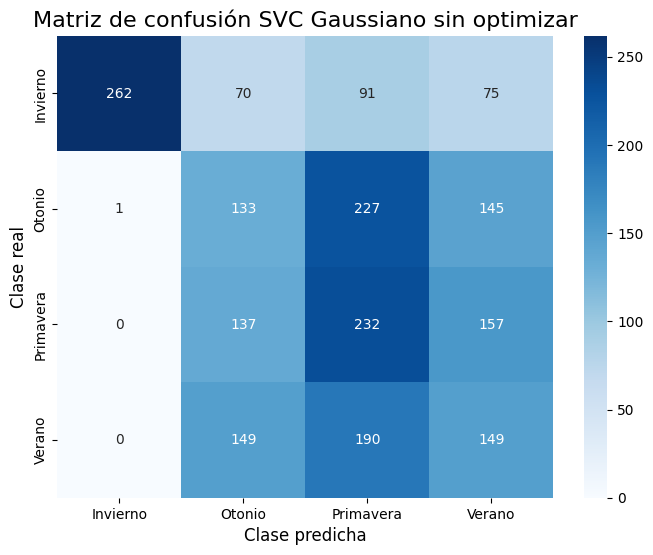

In [117]:
cm_gaussian = confusion_matrix(y_test, y_pred_svc_gaussian_kernel_base)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_gaussian, annot=True, fmt='d', cmap='Blues', xticklabels=clase_nombres, yticklabels=clase_nombres)

plt.title('Matriz de confusión SVC Gaussiano sin optimizar', fontsize=16)
plt.xlabel('Clase predicha', fontsize=12)
plt.ylabel('Clase real', fontsize=12)

plt.show()

En general, vemos una performance muy similar al kernel lineal optimizado, aunque mejora notoriamente la presición de Invierno

#### Optimización

In [95]:
parameters_gaussian_kernel: dict[str, list[float]] = {
    'gamma' : [0.001, 0.01, 0.1, 1, 10, 40 ],
    'C' : [0.001, 0.01, 0.1, 1, 10, 40, 'scale', 'auto']
}

grid_search_gaussian_kernel = GridSearchCV(svc_gaussian_kernel_base, parameters_gaussian_kernel, scoring='accuracy', verbose=3, cv=2)

grid_search_gaussian_kernel.fit(X_train, y_train)

grid_search_gaussian_kernel.best_estimator_

Fitting 2 folds for each of 48 candidates, totalling 96 fits
[CV 1/2] END ..............C=0.001, gamma=0.001;, score=0.257 total time=   4.2s
[CV 2/2] END ..............C=0.001, gamma=0.001;, score=0.257 total time=   2.1s
[CV 1/2] END ...............C=0.001, gamma=0.01;, score=0.257 total time=   2.1s
[CV 2/2] END ...............C=0.001, gamma=0.01;, score=0.257 total time=   2.8s
[CV 1/2] END ................C=0.001, gamma=0.1;, score=0.257 total time=   3.1s
[CV 2/2] END ................C=0.001, gamma=0.1;, score=0.257 total time=   2.1s
[CV 1/2] END ..................C=0.001, gamma=1;, score=0.257 total time=   2.1s
[CV 2/2] END ..................C=0.001, gamma=1;, score=0.257 total time=   2.1s
[CV 1/2] END .................C=0.001, gamma=10;, score=0.257 total time=   2.1s
[CV 2/2] END .................C=0.001, gamma=10;, score=0.257 total time=   3.4s
[CV 1/2] END .................C=0.001, gamma=40;, score=0.257 total time=   3.0s
[CV 2/2] END .................C=0.001, gamma=40;

SVC(C=0.01, gamma=0.1, random_state=42)

In [96]:
y_pred_svc_gaussian_kernel_grid_search = grid_search_gaussian_kernel.predict(X_test)

print(classification_report(y_test, y_pred_svc_gaussian_kernel_grid_search))

              precision    recall  f1-score   support

    Invierno       0.96      0.53      0.68       498
      Otonio       0.00      0.00      0.00       506
   Primavera       0.30      0.99      0.46       526
      Verano       0.00      0.00      0.00       488

    accuracy                           0.39      2018
   macro avg       0.31      0.38      0.29      2018
weighted avg       0.31      0.39      0.29      2018



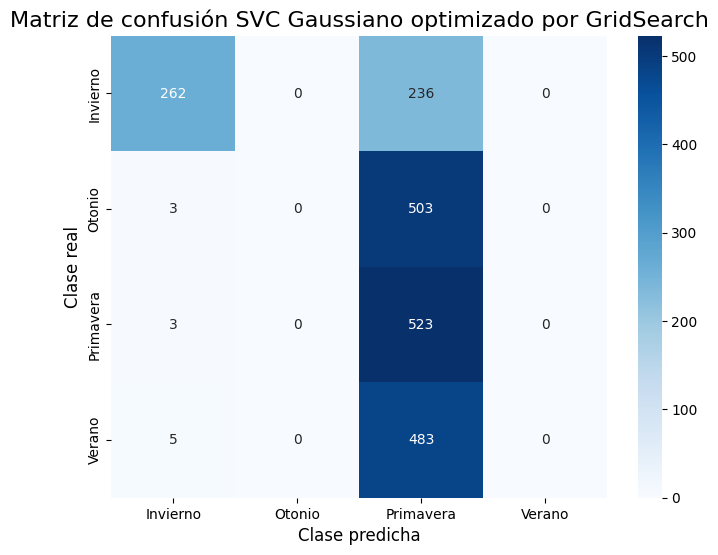

In [116]:
cm_gaussian_grid = confusion_matrix(y_test, y_pred_svc_gaussian_kernel_grid_search)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_gaussian_grid, annot=True, fmt='d', cmap='Blues', xticklabels=clase_nombres, yticklabels=clase_nombres)

plt.title('Matriz de confusión SVC Gaussiano optimizado por GridSearch', fontsize=16)
plt.xlabel('Clase predicha', fontsize=12)
plt.ylabel('Clase real', fontsize=12)

plt.show()

Si bien se obtiene un Recall general del modelo igual al obtenido sin optimizar los parámetros, vemos que falla notablemente en identificar las clases Otoño y Verano, asignándolos como Primavera.

#### Cross-Validation

In [97]:
svc_gaussian_kfold: SVC = SVC(kernel='rbf', random_state=42).fit(X_train, y_train)
sfolder_gaussian: StratifiedKFold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

recall_metrics_gaussian: dict[str, float] = {}
f1_metrics_gaussian: dict[str, float] = {}
precision_metrics_gaussian: dict[str, float] = {}
accuracy_metrics_gaussian: dict[str, float] = {}

gen_gaussian: Generator = sfolder_gaussian.split(X, y)
count_gaussian: int = 1

for train_index, test_index in gen_gaussian:

    x_train_fold_gaussian, x_test_fold_gaussian = X.iloc[train_index], X.iloc[test_index]
    y_train_fold_gaussian, y_test_fold_gaussian = y.iloc[train_index], y.iloc[test_index]

    svc_gaussian_kfold.fit(x_train_fold_gaussian, y_train_fold_gaussian)

    y_pred_svc_gaussian_kfold = svc_gaussian_kernel_base.predict(x_test_fold_gaussian)

    recall_metrics_gaussian[f'Recall {count_gaussian}'] = recall_score(y_test_fold_gaussian, y_pred_svc_gaussian_kfold, average='macro')
    f1_metrics_gaussian[f'F1 - {count_gaussian}'] = f1_score(y_test_fold_gaussian, y_pred_svc_gaussian_kfold, average='macro')
    precision_metrics_gaussian[f'Precision {count_gaussian}'] = precision_score(y_test_fold_gaussian, y_pred_svc_gaussian_kfold, average='macro')
    accuracy_metrics_gaussian[f'Accuracy {count_gaussian}'] = accuracy_score(y_test_fold_gaussian, y_pred_svc_gaussian_kfold)

    print(f'Métricas del conjunto nro: {count_gaussian}')
    print(f'Recall: {recall_metrics_gaussian[f"Recall {count_gaussian}"]}')
    print(f'F1: {f1_metrics_gaussian[f"F1 - {count_gaussian}"]}')
    print(f'Precision: {precision_metrics_gaussian[f"Precision {count_gaussian}"]}')
    print(f'Accuracy: {accuracy_metrics_gaussian[f"Accuracy {count_gaussian}"]}')
    print("--------------------------------------------------------------------------------")

    count_gaussian += 1

Métricas del conjunto nro: 1
Recall: 0.44491110596231076
F1: 0.46019360895612427
Precision: 0.5178276621143022
Accuracy: 0.44598612487611494
--------------------------------------------------------------------------------
Métricas del conjunto nro: 2
Recall: 0.43676212542477605
F1: 0.45336338278432553
Precision: 0.5122894440347606
Accuracy: 0.4375619425173439
--------------------------------------------------------------------------------
Métricas del conjunto nro: 3
Recall: 0.44353622181031815
F1: 0.46115183290463735
Precision: 0.5193197824381042
Accuracy: 0.44400396432111
--------------------------------------------------------------------------------
Métricas del conjunto nro: 4
Recall: 0.4309387792926894
F1: 0.448139877611164
Precision: 0.5002529162335219
Accuracy: 0.43161546085232905
--------------------------------------------------------------------------------
Métricas del conjunto nro: 5
Recall: 0.42681461960529926
F1: 0.4453479839874654
Precision: 0.5011065100921448
Accuracy:

Se obtienen metricas similares para todos los conjuntos de validación, con métricas mejores a las obtenidas en el conjunto de GridSearch

## Random Forest

In [107]:
rf: RandomForestClassifier = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

    Invierno       0.82      0.55      0.66       498
      Otonio       0.24      0.27      0.25       506
   Primavera       0.28      0.29      0.28       526
      Verano       0.26      0.30      0.28       488

    accuracy                           0.35      2018
   macro avg       0.40      0.35      0.37      2018
weighted avg       0.40      0.35      0.37      2018



### Matriz de confusión

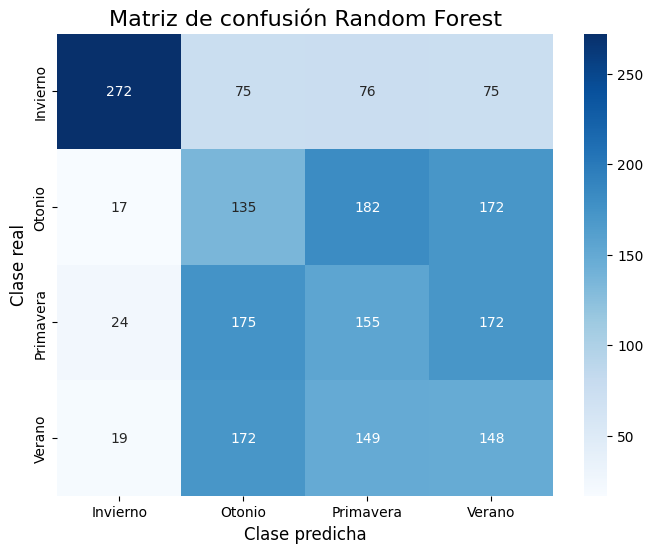

In [115]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=clase_nombres, yticklabels=clase_nombres)

plt.title('Matriz de confusión Random Forest', fontsize=16)
plt.xlabel('Clase predicha', fontsize=12)
plt.ylabel('Clase real', fontsize=12)

plt.show()

Se observa que se obtiene un Recall ligeramente menor que en los modelos de SVC. Sin embargo, en este caso el modelo no tiende a predecir la clase como Primavera.


### Variación de parámetros

Se analiza el comportamiento del modelo al variar la cantidad de estimadores y la máxima profundidad del árbol


#### Variando la cantidad de estimadores

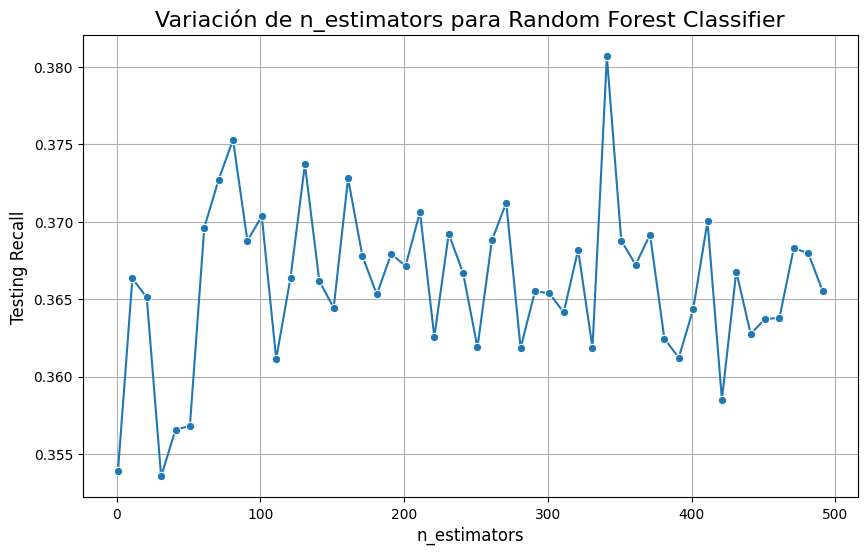

In [119]:
scores_estimators =[]
for k in range(1, 500, 10):
    rf_estimators = RandomForestClassifier(n_estimators=k)
    rf_estimators.fit(X_train, y_train)
    y_pred_rf_estimators = rf_estimators.predict(X_test)
    scores_estimators.append(recall_score(y_test, y_pred_rf_estimators, average= 'macro'))

plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, 500, 10), y=scores_estimators, marker='o')

plt.title('Variación de n_estimators para Random Forest Classifier', fontsize=16)
plt.xlabel('n_estimators', fontsize=12)
plt.ylabel('Testing Recall', fontsize=12)

plt.grid(True)
plt.show()

No encontramos una grand diferencia en Recall al variar el número de estimadores

#### Variando la profundidad máxima

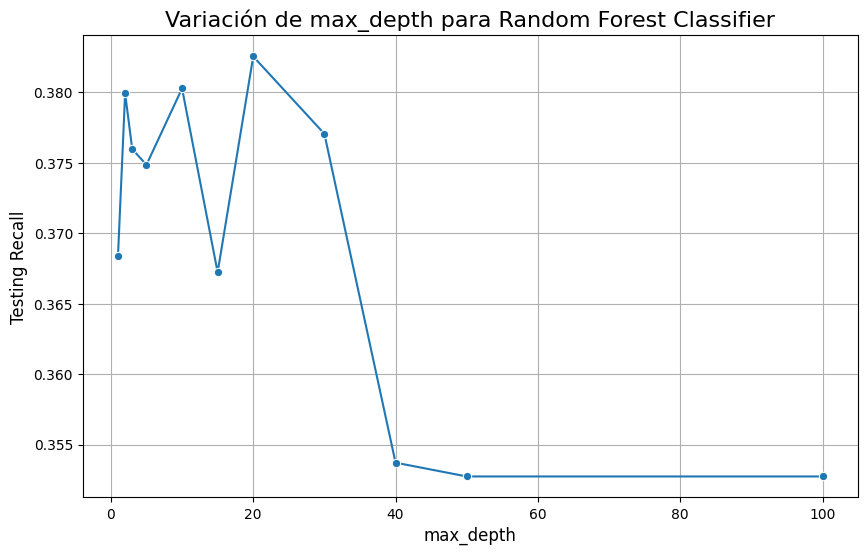

In [120]:
scores_depth = []
depth_range = [1, 2, 3, 5, 10, 15, 20, 30, 40, 50, 100, None]

for max_depth in depth_range:
    rf_model = RandomForestClassifier(max_depth=max_depth, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)

    score = recall_score(y_test, y_pred, average='macro')
    scores_depth.append(score)

# Gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(x=depth_range, y=scores_depth, marker='o')

plt.title('Variación de max_depth para Random Forest Classifier', fontsize=16)
plt.xlabel('max_depth', fontsize=12)
plt.ylabel('Testing Recall', fontsize=12)
plt.grid(True)
plt.show()

Vemos que Recall se mantiene relativamente constante hasta una profundidad máxima = 20


### Optimización de parámetros

Se realiza una busqueda aleatoria para optimizar los hiperparámetros

In [109]:
param_dist: dict[str,int] = {'n_estimators': randint(50,500), 'max_depth': randint(1,20)}

rand_search = RandomizedSearchCV(rf, param_distributions = param_dist, n_iter=5, cv=5)
rand_search.fit(X_train, y_train)
print('Best hyperparameters:', rand_search.best_params_)

Best hyperparameters: {'max_depth': 2, 'n_estimators': 457}


In [110]:
best_rf = rand_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print(classification_report(y_test, y_pred_best_rf))

              precision    recall  f1-score   support

    Invierno       0.83      0.54      0.66       498
      Otonio       0.24      0.01      0.02       506
   Primavera       0.31      0.91      0.46       526
      Verano       0.28      0.06      0.10       488

    accuracy                           0.39      2018
   macro avg       0.42      0.38      0.31      2018
weighted avg       0.41      0.39      0.31      2018



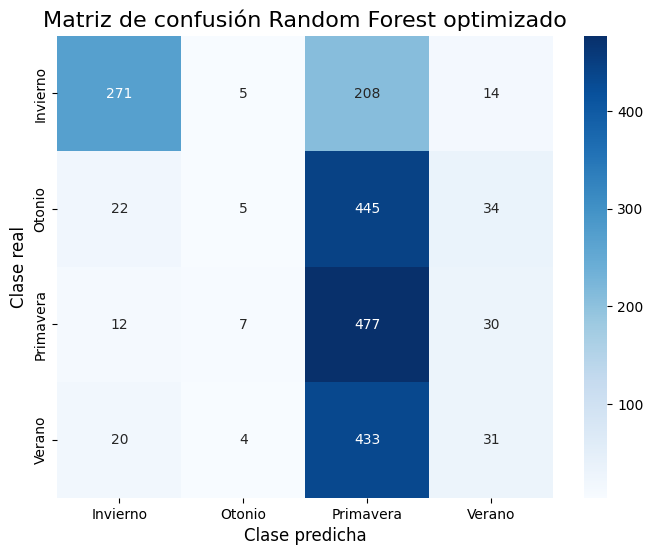

In [121]:
cm_best_rf = confusion_matrix(y_test, y_pred_best_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_best_rf, annot=True, fmt='d', cmap='Blues', xticklabels=clase_nombres, yticklabels=clase_nombres)

plt.title('Matriz de confusión Random Forest optimizado', fontsize=16)
plt.xlabel('Clase predicha', fontsize=12)
plt.ylabel('Clase real', fontsize=12)

plt.show()

Se obtiene métricas ligeramentes superiores, aunque nos encontramos que vuelve la tendencia a indicar como Primavera a las clases Otoño y Verano.

In [112]:
rf_kfold: RandomForestClassifier = RandomForestClassifier(random_state=42)
sfolder_rf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

recall_metrics_rf: dict[str, float] = {}
f1_metrics_rf: dict[str, float] = {}
precision_metrics_rf: dict[str, float] = {}
accuracy_metrics_rf: dict[str, float] = {}

gen_rf: Generator = sfolder_rf.split(X, y)
count_rf: int = 1

for train_index, test_index in gen_rf:
    x_train_fold_rf, x_test_fold_rf = X.iloc[train_index], X.iloc[test_index]
    y_train_fold_rf, y_test_fold_rf = y.iloc[train_index], y.iloc[test_index]

    # Perform RandomizedSearchCV to find the best hyperparameters
    rf_kfold.fit(x_train_fold_rf, y_train_fold_rf)

    # Print the best hyperparameters
    print(f'Best hyperparameters for fold {count_rf}:', rand_search.best_params_)

    # Predict using the best model
    y_pred_rf_kfold = best_rf.predict(x_test_fold_rf)

    recall_metrics_rf[f'Recall {count_rf}'] = recall_score(y_test_fold_rf, y_pred_best_rf, average='macro')
    f1_metrics_rf[f'F1 - {count_rf}'] = f1_score(y_test_fold_rf, y_pred_best_rf, average='macro')
    precision_metrics_rf[f'Precision {count_rf}'] = precision_score(y_test_fold_rf, y_pred_best_rf, average='macro')
    accuracy_metrics_rf[f'Accuracy {count_rf}'] = accuracy_score(y_test_fold_rf, y_pred_best_rf)

    print(f'Métricas del conjunto nro: {count_rf}')
    print(f'Recall: {recall_metrics_rf[f"Recall {count_rf}"]}')
    print(f'F1: {f1_metrics_rf[f"F1 - {count_rf}"]}')
    print(f'Precision: {precision_metrics_rf[f"Precision {count_rf}"]}')
    print(f'Accuracy: {accuracy_metrics_rf[f"Accuracy {count_rf}"]}')
    print("--------------------------------------------------------------------------------")

    count_rf += 1

Best hyperparameters for fold 1: {'max_depth': 2, 'n_estimators': 457}
Métricas del conjunto nro: 1
Recall: 0.2562252857584183
F1: 0.17916361887612087
Precision: 0.27575783681473165
Accuracy: 0.2616451932606541
--------------------------------------------------------------------------------
Best hyperparameters for fold 2: {'max_depth': 2, 'n_estimators': 457}
Métricas del conjunto nro: 2
Recall: 0.24777092987333954
F1: 0.16794541485080683
Precision: 0.23309161405077866
Accuracy: 0.25322101090188304
--------------------------------------------------------------------------------
Best hyperparameters for fold 3: {'max_depth': 2, 'n_estimators': 457}
Métricas del conjunto nro: 3
Recall: 0.2612717794253939
F1: 0.18647328753608403
Precision: 0.27963056612689463
Accuracy: 0.2666005946481665
--------------------------------------------------------------------------------
Best hyperparameters for fold 4: {'max_depth': 2, 'n_estimators': 457}
Métricas del conjunto nro: 4
Recall: 0.252794799618

Las metricas, aunque sean consistentes, son peores a las obtenidas en el conjunto base de RandomizedSearch

---

# Conclusiones finales

Nos encontramos con un dataset con poca diferenciación entre las clases y con un tamaño reducido. Esto impactó directamente en las métricas y resultados obtenidos por cada modelo.

Los resultados fueron pobres, mostrando una marcada tendencia a la predicción de la estación como 'Primavera'.

Para comenzar, se analizó SVC Lineal con C=0.2. Luego de ajustar los parámetros con GridSearch, se alcanzó un Recall de 0.38.

En el caso de SVC Gaussiano, se asumió en un principio que este modelo proporcionaría mejores resultados. Esto se verificó, ya que el modelo con parámetros base (parametros default del modelo) generó una predicción similar al del kernel lineal. Tras la optimización de parámetros con GridSearch, aunque las métricas generales del modelo mejoraron o se mantuvieron similares, se observó una nula predicción para las estaciones de Otoño y Verano, lo que llevó a considerar más efectivo el modelo base.

Algo similar ocurrió con Random Forest. El modelo base mostró un Recall general menor en comparación con el modelo optimizado; sin embargo, logró identificar correctamente más instancias de ciertas clases individuales. Esto indica que el modelo base, al no estar ajustado, opera de manera más equilibrada entre todas las clases, lo que resulta en un mayor número de aciertos en categorías específicas.

Se observó que en la optimización de modelos se prioriza maximizar el rendimiento global a costa de sacrificar el desempeño específico en cada clase.

En conclusión, para este dataset, aunque no se llegó a un modelo que prediga correctamente, el más adecuado fue SVC con kernel Gaussiano base, ya que logró un correcto equilibrio entre costo computacional y rendimiento específico por clase.